<a href="https://colab.research.google.com/github/datadynamo/aiconf_ny_2019_pytorch/blob/master/02_Linear_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example: Linear Regression

This follows a simple example from https://github.com/yunjey/pytorch-tutorial.

In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

Define model parameters

In [0]:
NUM_EPOCHS    = 80
LEARNING_RATE = 0.001

Create random toy data

In [0]:
x_train = np.linspace(0, 1, num = 100, dtype = np.float32) \
            .reshape(100, 1)
epsilon = np.random.normal(0, 1, size=100).astype('f') \
            .reshape(100, 1)
w = 2.0
b = 0.5
y_train = w * x_train + b + epsilon

Plot toy data

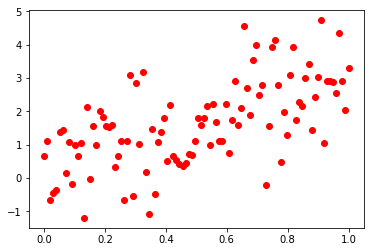

In [0]:
plt.plot(x_train, y_train, 'ro', label='Toy data')
plt.show()

Define a linear model (y = x AT + b) for input/output

In [0]:
model = nn.Linear(x_train.shape[1], y_train.shape[1])

Define loss and optimizer

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

Train the model

In [0]:
for epoch in range(NUM_EPOCHS):
    
    # Convert numpy arrays to torch tensors
    inputs  = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # FORWARD PASS
    outputs = model(inputs)
    loss    = criterion(outputs, targets)
    
    # BACKWARD AND OPTIMIZE
    # zero gradients (at the start of a minibatch)
    optimizer.zero_grad()
    # computes dloss/dx for every parameter x
    loss.backward()
    # optimizer.step performs a parameter update based on the current gradient 
    # (stored in .grad attribute of a parameter) 
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [10/80], Loss: 4.4823
Epoch [20/80], Loss: 4.3214
Epoch [30/80], Loss: 4.1684
Epoch [40/80], Loss: 4.0230
Epoch [50/80], Loss: 3.8848
Epoch [60/80], Loss: 3.7534
Epoch [70/80], Loss: 3.6285
Epoch [80/80], Loss: 3.5097


Plot the fitted line

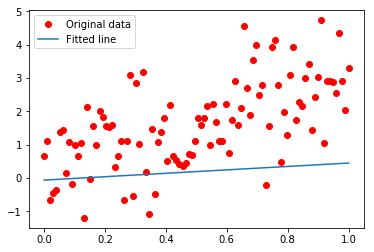

In [0]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

Check parameters

In [0]:
print('w:', model.weight) 
print('b:', model.bias)

w: Parameter containing:
tensor([[0.5125]], requires_grad=True)
b: Parameter containing:
tensor([-0.0658], requires_grad=True)


And optionally save model checkpoint

In [0]:
# torch.save(model.state_dict(), 'model.ckpt')